# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [2]:
df = pd.DataFrame({'P1': p1, 'P2': p2})

notas = df[['P1', 'P2']].values.T 

T = np.array([[0.5, 0.5],
              [1, -1]])

transformado = T @ notas  

media = transformado[0, :]
diferenca = transformado[1, :]

df['Media'] = media
df['Diferenca'] = diferenca

print(df.head())

         P1        P2     Media  Diferenca
0  6.964692  7.943428  7.454060  -0.978736
1  2.861393  5.099537  3.980465  -2.238143
2  2.268515  0.974429  1.621472   1.294085
3  5.513148  4.474359  4.993754   1.038788
4  7.194690  8.938402  8.066546  -1.743712


In [3]:
correlacao = df['P1'].corr(df['P2'])

print(f"Correlação entre P1 e P2: {correlacao:.4f}")

Correlação entre P1 e P2: 0.8957


In [4]:
df = pd.DataFrame({'P1': p1, 'P2': p2})

A = np.array([[0.5, 0.5], [1, -1]])

X = np.vstack((df['P1'], df['P2']))

transformado = A @ X

media = transformado[0]
diferenca = transformado[1]

df_transformado = pd.DataFrame({
    'Media': media,
    'Diferenca': diferenca
})

correlacao_md = df_transformado['Media'].corr(df_transformado['Diferenca'])

print(f"Correlação entre Média e Diferença: {correlacao_md:.4f}")

Correlação entre Média e Diferença: -0.1335


In [ ]:
# Na primeira correlação forte indica que quem foi bem na p1 foi bem na p2

# Na segunda a correlação é fraca, após a transformação linear sconseguimos quebrar ou reduzir a depedência;

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

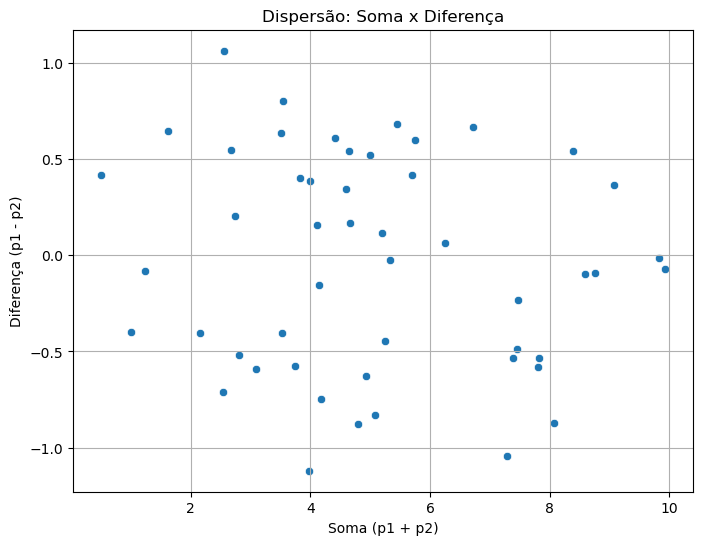

In [5]:
%matplotlib inline

np.random.seed(123)

p1 = np.random.random(50) * 10
p1[p1 > 10] = 10
p1[p1 < 0] = 0

p2 = p1 + np.random.normal(0, 1, 50)
p2[p2 > 10] = 10
p2[p2 < 0] = 0

X = np.vstack((p1, p2))

T = np.array([[1, 1],
              [1, -1]]) * 0.5  

Y = T @ X

soma = Y[0, :]
diferenca = Y[1, :]

df_transf = pd.DataFrame({
    'Soma': soma,
    'Diferenca': diferenca
})

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_transf, x='Soma', y='Diferenca')
plt.title('Dispersão: Soma x Diferença')
plt.xlabel('Soma (p1 + p2)')
plt.ylabel('Diferença (p1 - p2)')
plt.grid(True)
plt.show()